In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
mydata = pd.read_csv("housing.csv")

In [338]:
mydata

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [339]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [340]:
mydata.dropna(inplace=True)

In [341]:
from sklearn.model_selection import train_test_split
X = mydata.drop(['median_house_value'],axis=1) 
y = mydata['median_house_value']

In [342]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [343]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [344]:
train_data=X_train.join(y_train)


In [345]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11116,-117.87,33.84,25,1928,414.0,961,385,4.0724,<1H OCEAN,231400
623,-122.18,37.72,45,1498,313.0,1003,305,3.8047,NEAR BAY,156700
17541,-121.87,37.35,37,1566,375.0,1223,346,3.2793,<1H OCEAN,174500
3533,-118.54,34.26,23,4960,592.0,1929,586,10.9052,<1H OCEAN,500001
19209,-122.71,38.46,42,1574,376.0,844,369,2.3140,<1H OCEAN,169400
...,...,...,...,...,...,...,...,...,...,...
11051,-117.86,33.79,31,3523,922.0,2660,949,3.1792,<1H OCEAN,146400
4000,-118.63,34.18,33,5252,760.0,2041,730,6.7977,<1H OCEAN,389700
683,-122.14,37.68,27,3337,613.0,1489,607,3.6364,NEAR BAY,219200
3336,-122.50,38.82,12,2394,443.0,877,341,2.5625,INLAND,109200


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

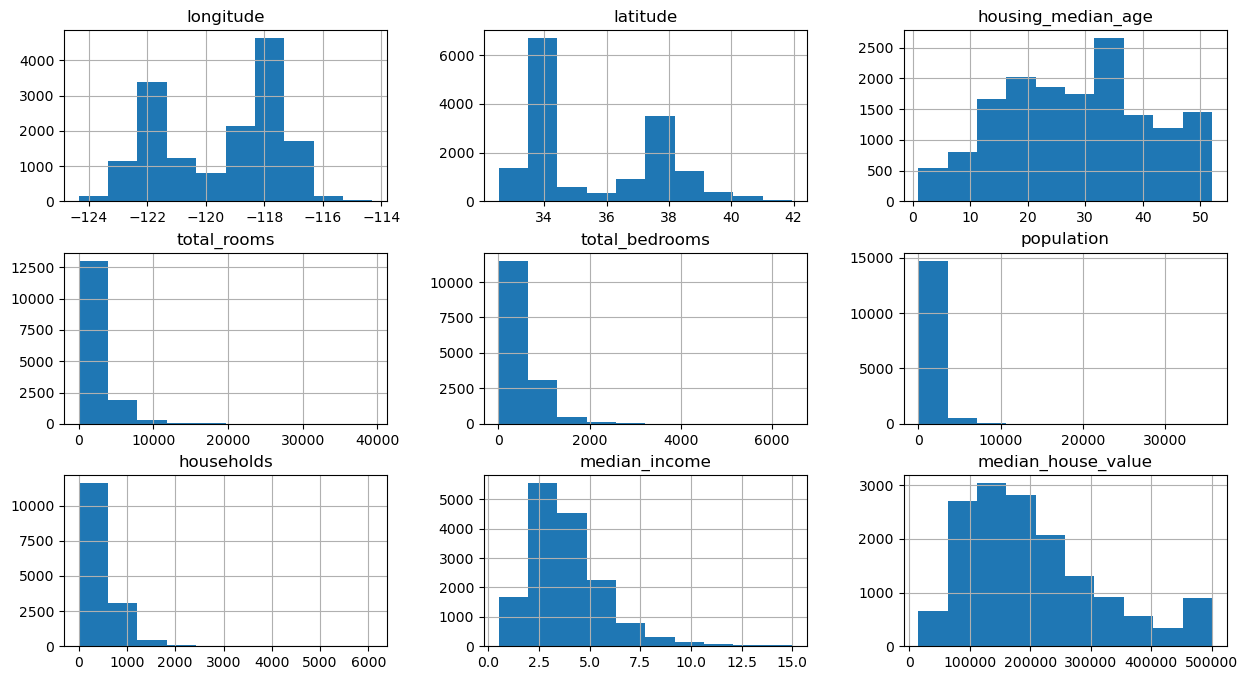

In [346]:
train_data.hist(figsize=(15,8))


<Axes: >

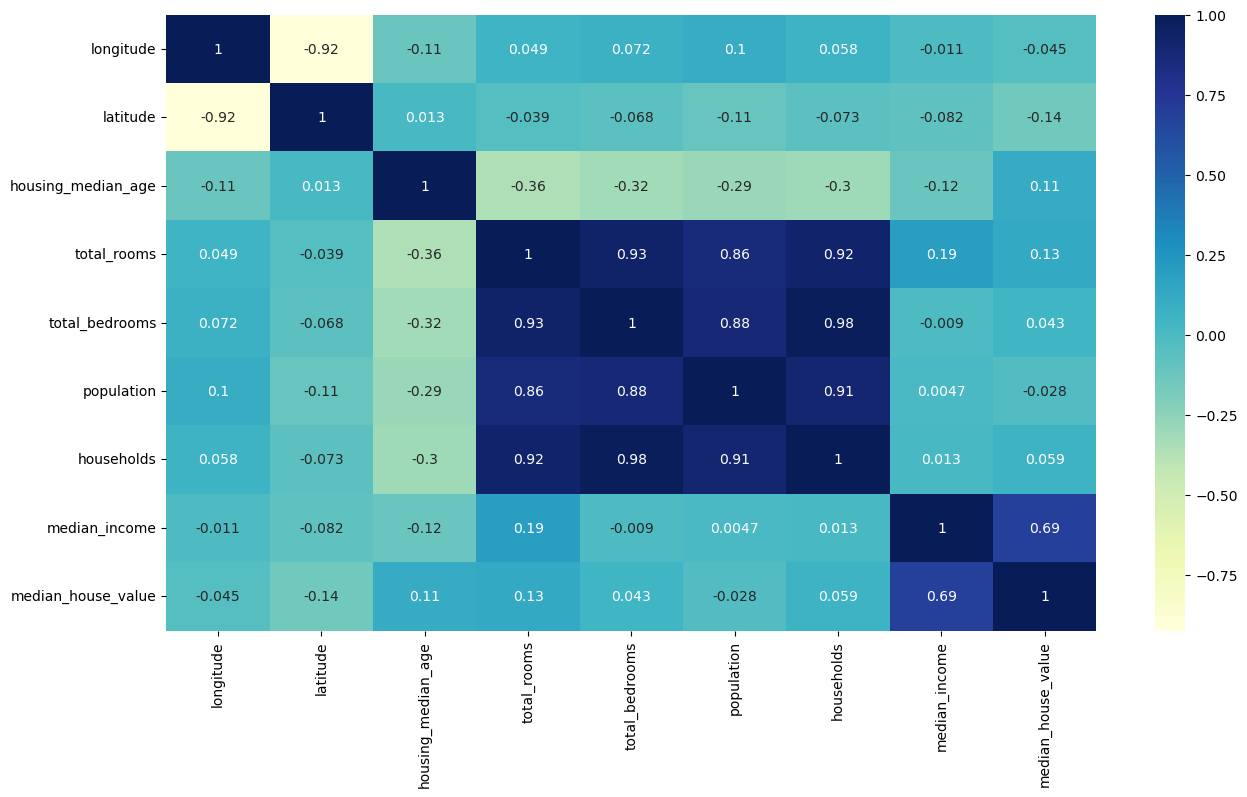

In [347]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")


In [348]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

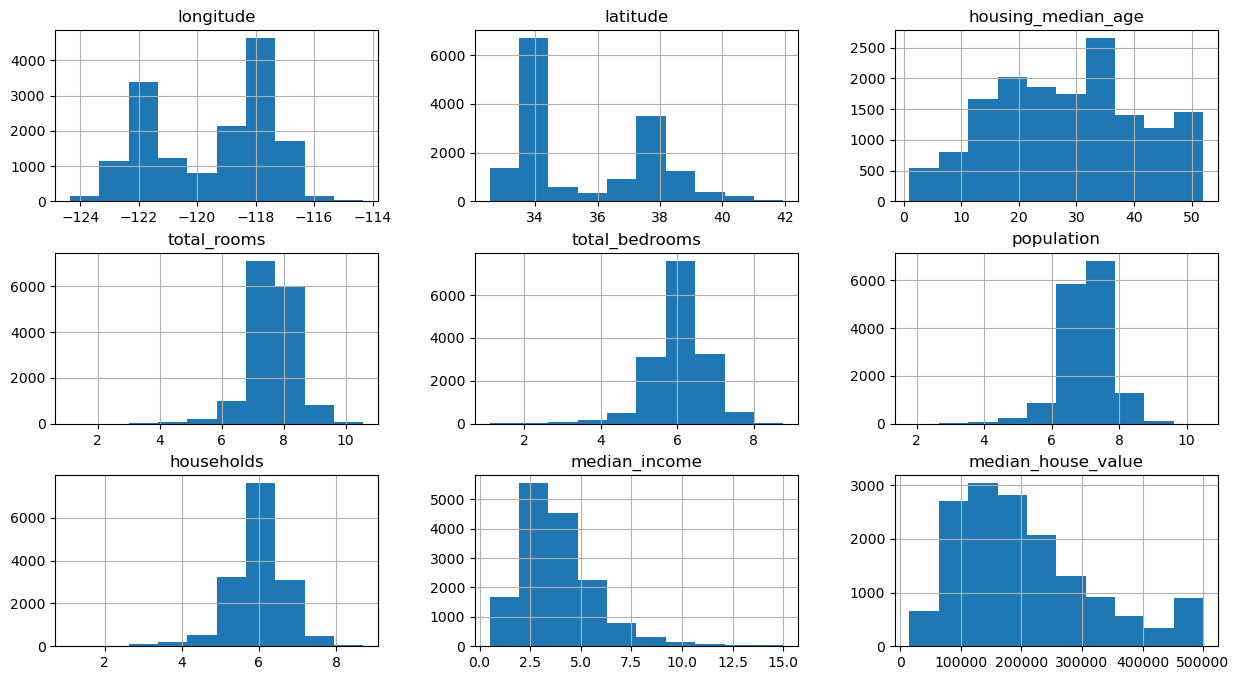

In [349]:
train_data.hist(figsize=(15,8))

In [350]:
#train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)


In [351]:

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11116,-117.87,33.84,25,7.564757,6.028279,6.869014,5.955837,4.0724,231400,True,False,False,False,False
623,-122.18,37.72,45,7.312553,5.749393,6.911747,5.723585,3.8047,156700,False,False,False,True,False
17541,-121.87,37.35,37,7.356918,5.929589,7.109879,5.849325,3.2793,174500,True,False,False,False,False
3533,-118.54,34.26,23,8.509363,6.385194,7.565275,6.375025,10.9052,500001,True,False,False,False,False
19209,-122.71,38.46,42,7.362011,5.932245,6.739337,5.913503,2.3140,169400,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,-117.86,33.79,31,8.167352,6.827629,7.886457,6.856462,3.1792,146400,True,False,False,False,False
4000,-118.63,34.18,33,8.566555,6.634633,7.621685,6.594413,6.7977,389700,True,False,False,False,False
683,-122.14,37.68,27,8.113127,6.419995,7.306531,6.410175,3.6364,219200,False,False,False,True,False
3336,-122.50,38.82,12,7.781139,6.095825,6.777647,5.834811,2.5625,109200,False,True,False,False,False


In [352]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11116,-117.87,33.84,25,7.564757,6.028279,6.869014,5.955837,4.0724,231400,True,False,False,False,False
623,-122.18,37.72,45,7.312553,5.749393,6.911747,5.723585,3.8047,156700,False,False,False,True,False
17541,-121.87,37.35,37,7.356918,5.929589,7.109879,5.849325,3.2793,174500,True,False,False,False,False
3533,-118.54,34.26,23,8.509363,6.385194,7.565275,6.375025,10.9052,500001,True,False,False,False,False
19209,-122.71,38.46,42,7.362011,5.932245,6.739337,5.913503,2.3140,169400,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,-117.86,33.79,31,8.167352,6.827629,7.886457,6.856462,3.1792,146400,True,False,False,False,False
4000,-118.63,34.18,33,8.566555,6.634633,7.621685,6.594413,6.7977,389700,True,False,False,False,False
683,-122.14,37.68,27,8.113127,6.419995,7.306531,6.410175,3.6364,219200,False,False,False,True,False
3336,-122.50,38.82,12,7.781139,6.095825,6.777647,5.834811,2.5625,109200,False,True,False,False,False


<Axes: >

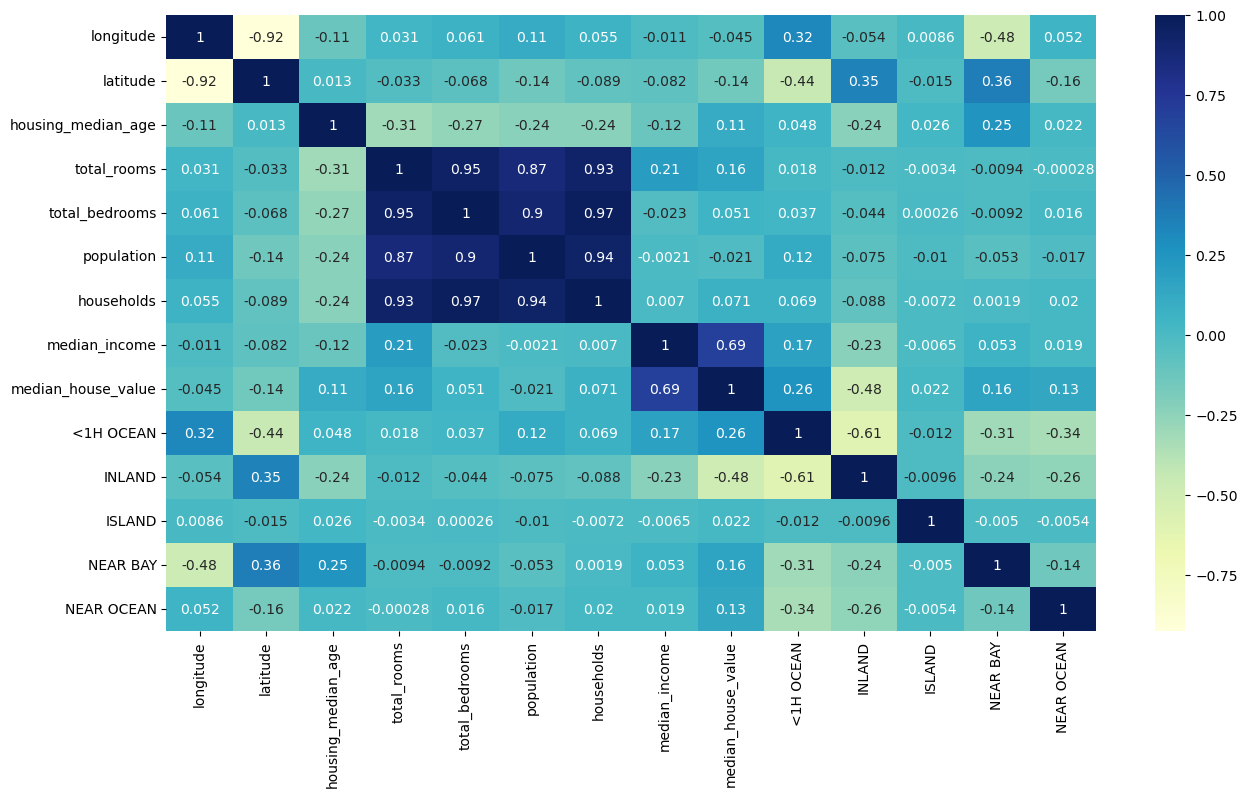

In [353]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

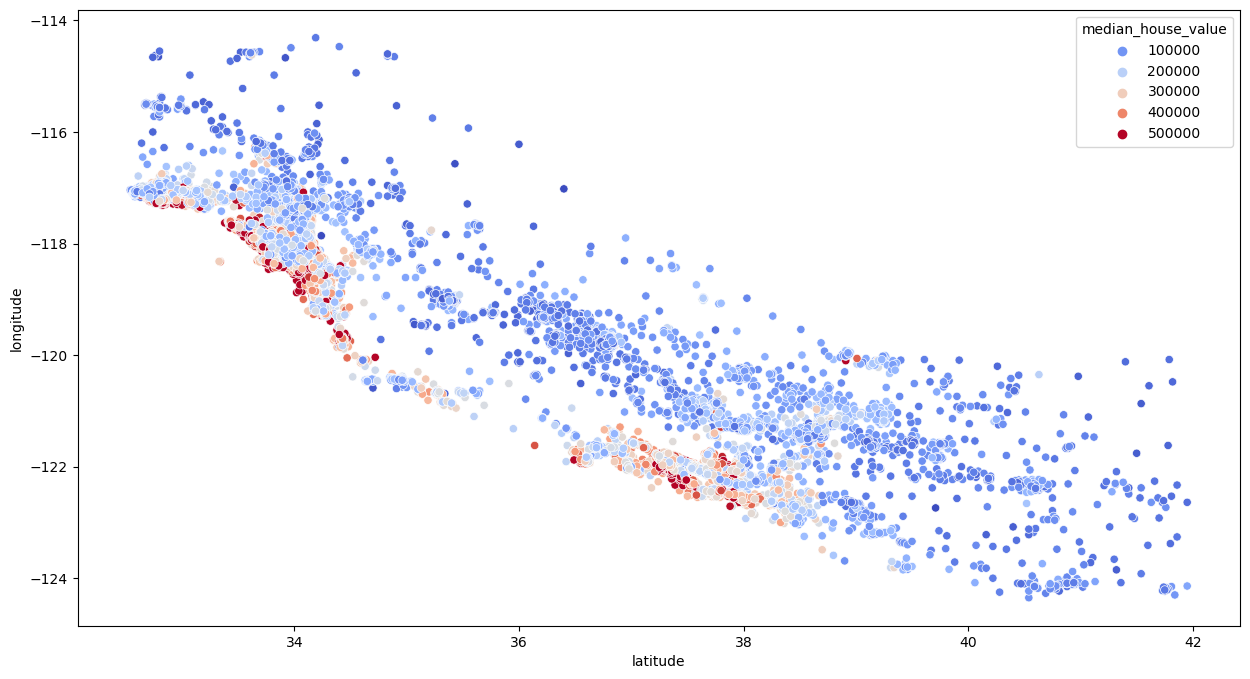

In [354]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

# Feature engineering

In [355]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']


<Axes: >

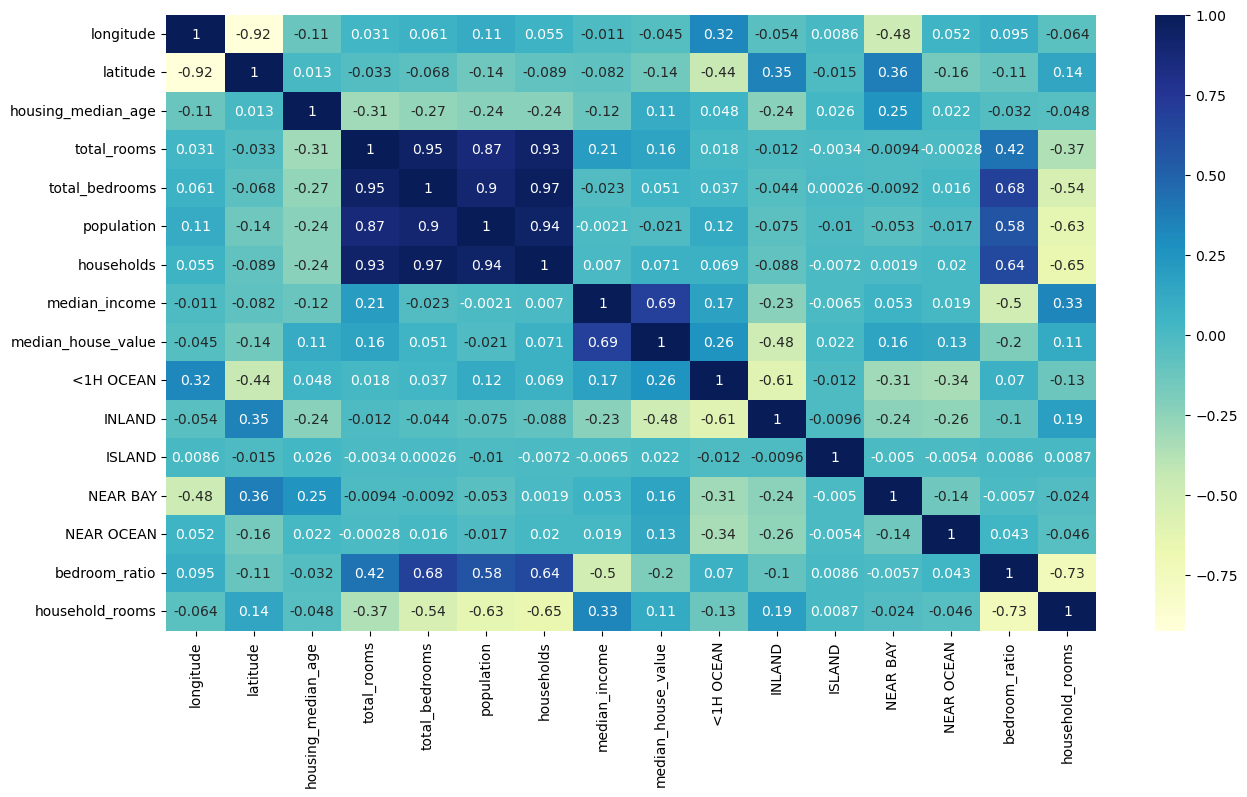

In [356]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Assuming train_data contains features and target variable 'median_house_value'
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)


LinearRegression()

In [358]:
test_data=X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

#test_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']



In [359]:
X_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [360]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8314,-118.32,33.35,27,7.424165,6.257668,6.613384,5.805135,2.1579,450000,False,False,True,False,False,0.842878,1.278896
12039,-117.46,33.90,10,9.183894,7.664347,8.504513,7.518064,3.3187,144800,False,True,False,False,False,0.834542,1.221577
16778,-122.47,37.68,31,8.313362,6.656727,7.841886,6.605298,4.5337,306700,False,False,False,False,True,0.800726,1.258590
14702,-117.07,32.79,36,8.184235,6.466145,7.445418,6.401917,3.9745,170800,False,False,False,False,True,0.790073,1.278404
15986,-122.47,37.76,48,7.632886,6.184149,6.962243,6.148468,2.8711,329600,False,False,False,True,False,0.810198,1.241429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,-118.28,34.05,41,6.981006,6.393591,7.723562,6.421622,1.3000,162500,True,False,False,False,False,0.915855,1.087109
6900,-118.14,34.03,38,7.277939,5.683580,6.949856,5.652489,4.1375,211500,True,False,False,False,False,0.780933,1.287563
5984,-117.73,34.12,26,8.773385,6.796824,7.819234,6.786717,6.2089,261800,False,True,False,False,False,0.774709,1.292729
16327,-121.34,37.98,8,7.874359,6.061457,7.055313,5.976351,5.3002,191700,False,True,False,False,False,0.769771,1.317586


In [361]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11116,-117.87,33.84,25,7.564757,6.028279,6.869014,5.955837,4.0724,231400,True,False,False,False,False,0.796890,1.270142
623,-122.18,37.72,45,7.312553,5.749393,6.911747,5.723585,3.8047,156700,False,False,False,True,False,0.786236,1.277618
17541,-121.87,37.35,37,7.356918,5.929589,7.109879,5.849325,3.2793,174500,True,False,False,False,False,0.805988,1.257738
3533,-118.54,34.26,23,8.509363,6.385194,7.565275,6.375025,10.9052,500001,True,False,False,False,False,0.750373,1.334797
19209,-122.71,38.46,42,7.362011,5.932245,6.739337,5.913503,2.3140,169400,True,False,False,False,False,0.805791,1.244949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,-117.86,33.79,31,8.167352,6.827629,7.886457,6.856462,3.1792,146400,True,False,False,False,False,0.835966,1.191190
4000,-118.63,34.18,33,8.566555,6.634633,7.621685,6.594413,6.7977,389700,True,False,False,False,False,0.774481,1.299062
683,-122.14,37.68,27,8.113127,6.419995,7.306531,6.410175,3.6364,219200,False,False,False,True,False,0.791310,1.265664
3336,-122.50,38.82,12,7.781139,6.095825,6.777647,5.834811,2.5625,109200,False,True,False,False,False,0.783410,1.333572


In [362]:
reg.score(X_test,y_test)

0.6704791231073594

In [363]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the RandomForestRegressor model
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred = forest.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 2539725312.9687176
Mean Absolute Error: 33064.43770796633
R-squared: 0.8144390554541125
Root Mean Squared Error: 50395.68744415257


Linear Regression Score: 0.6745993516531381
Mean Squared Error: 2423401571.7259793
Mean Absolute Error: 32300.814492072815
R-squared: 0.8201131202527971
Root Mean Squared Error: 49228.05675350165


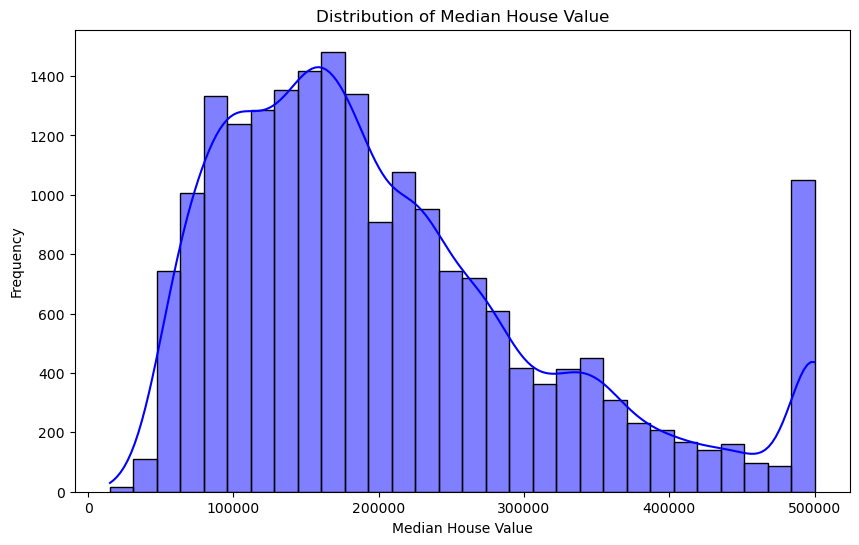

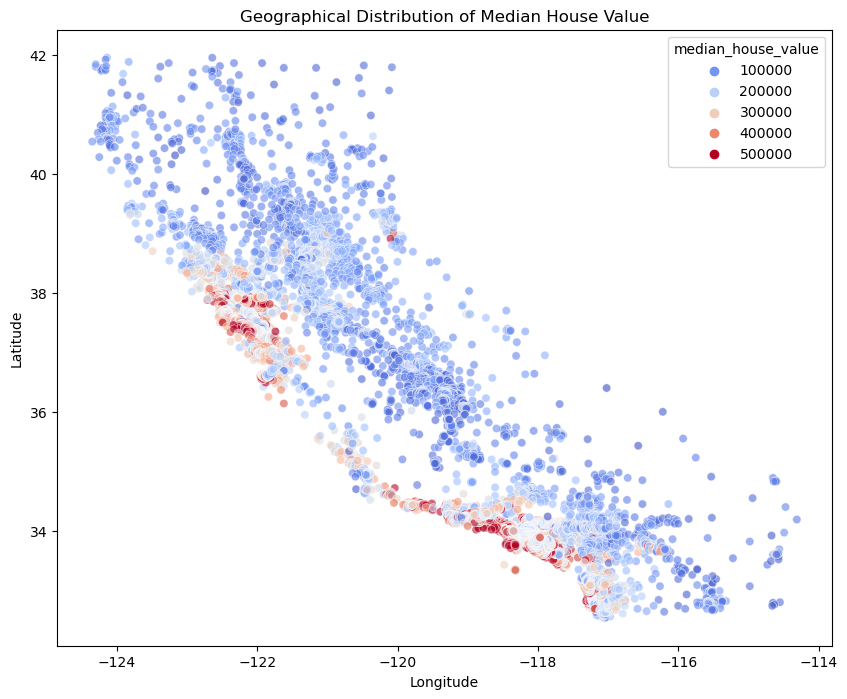

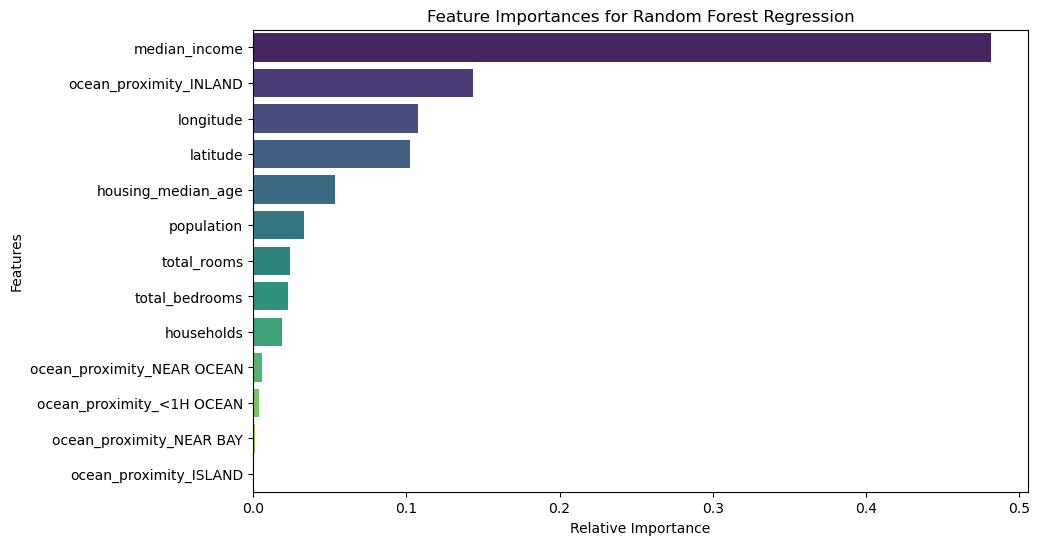

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the data
mydata = pd.read_csv("housing.csv")

# Drop missing values
mydata.dropna(inplace=True)

# Split the data into features and target variable
X = mydata.drop(['median_house_value'], axis=1)
y = mydata['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Feature engineering
X_train['total_rooms'] = np.log(X_train['total_rooms'] + 1)
X_train['total_bedrooms'] = np.log(X_train['total_bedrooms'] + 1)
X_train['population'] = np.log(X_train['population'] + 1)
X_train['households'] = np.log(X_train['households'] + 1)

# One-hot encode categorical variable
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'])

# Define and train the Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Transform test data
X_test['total_rooms'] = np.log(X_test['total_rooms'] + 1)
X_test['total_bedrooms'] = np.log(X_test['total_bedrooms'] + 1)
X_test['population'] = np.log(X_test['population'] + 1)
X_test['households'] = np.log(X_test['households'] + 1)
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'])

# Print the score of Linear Regression model
print("Linear Regression Score:", reg.score(X_test, y_test))

# Define and train the Random Forest Regression model
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = forest.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Visualize the scatter plot between latitude and longitude colored by median_house_value
plt.figure(figsize=(10, 8))
sns.scatterplot(x="longitude", y="latitude", data=mydata, hue="median_house_value", palette="coolwarm", alpha=0.6)
plt.title('Geographical Distribution of Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualize feature importances for Random Forest Regression
plt.figure(figsize=(10, 6))
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
sns.barplot(x=importances[indices], y=X_train.columns[indices], palette="viridis")
plt.title('Feature Importances for Random Forest Regression')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()
